In [30]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.drop(columns=['CustomerID','Gender','Spending Score (1-100)'],inplace=True)

In [32]:
df['Income'] = df['Annual Income (k$)']
df.drop(columns='Annual Income (k$)',inplace=True)

In [33]:
df

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [41]:
scaler = MinMaxScaler()

scaler = MinMaxScaler()
kmeans = KMeans()

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("kmeans", KMeans())
])

df[['Age','Income']]= pipe["scaler"].fit_transform(df[['Age','Income']])


y_pred= pipe.fit_predict(df)
y_pred

C:\Users\INTEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\INTEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 7, 1, 7, 1, 6, 7, 6, 7, 5, 1, 7, 1, 7, 1, 5, 7, 7, 1,
       5, 7, 5, 7, 5, 7, 7, 1, 6, 1, 5, 1, 5, 1, 5, 7, 7, 1, 6, 1, 5, 7,
       5, 1, 5, 7, 7, 7, 5, 7, 7, 6, 5, 5, 5, 6, 4, 5, 6, 4, 6, 5, 6, 4,
       5, 6, 4, 7, 6, 5, 6, 6, 6, 4, 5, 5, 4, 5, 6, 2, 6, 5, 4, 5, 0, 4,
       2, 0, 6, 4, 0, 2, 2, 4, 0, 4, 0, 4, 4, 0, 6, 4, 0, 4, 6, 0, 6, 6,
       6, 4, 2, 4, 4, 4, 6, 0, 0, 0, 4, 2, 2, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       4, 2, 4, 2, 0, 2, 4, 2, 0, 2, 2, 2, 4, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [42]:
df['Cluster']= y_pred

In [44]:
df.head()

,Age,Income,Cluster
0,0.019231,0.000000,1
1,0.057692,0.000000,1
2,0.038462,0.008197,1
3,0.096154,0.008197,1
4,0.250000,0.016393,7


In [48]:
pipe["kmeans"].cluster_centers_[0]

array([0.62352071, 0.47225725])

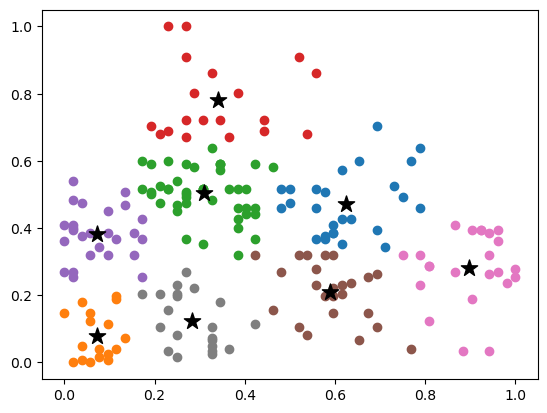

In [51]:
age = df['Age']
income = df['Income']
cluster = df['Cluster']

for i in range(cluster.nunique()):
    plt.scatter(age[cluster == i], income[cluster == i], label=f'Cluster {i}')

# Plot cluster centers
centers = pipe["kmeans"].cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=150, color='black', label='Cluster Center')
